In [1]:
import random
import alpaca_trade_api as tradeapi
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_ID")


In [3]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
companies = ["AAPL","SPY","TTCF","SPYD","ARW","MXIM","TXN","AMD","NVDA","LSCC","ENPH","RUN","SEDG"]
df = api.get_barset(companies, timeframe="day", limit=300).df

In [18]:
closes = df.xs("close", axis="columns", level=1)
returns = closes.pct_change()
returns.tail()

,AMAT,AMD,ARW,ENPH,IPHI,LSCC,MXIM,NVDA,QCOM,RUN,SEDG,SPWR,TXN
time,,,,,,,,,,,,,
2021-03-17 00:00:00-04:00,0.011981,-0.001691,0.012761,-0.012835,0.001689,0.017758,0.010644,0.004893,0.001908,0.003343,0.021237,-0.019452,0.012757
2021-03-18 00:00:00-04:00,-0.047607,-0.054574,-0.013057,-0.093761,-0.035039,-0.075047,-0.034668,-0.047174,-0.031321,-0.097860,-0.086579,-0.077848,-0.028592
2021-03-19 00:00:00-04:00,0.004552,0.012031,0.009529,0.044928,0.025206,0.011591,0.014774,0.009906,0.010560,0.080482,0.055451,0.038462,0.009696
2021-03-22 00:00:00-04:00,0.040610,0.015429,-0.000641,0.038548,0.006329,0.005167,0.015119,0.026507,0.022653,0.032386,0.028333,0.080038,0.023582
2021-03-23 00:00:00-04:00,-0.019010,-0.024430,-0.028061,-0.022221,-0.016147,-0.031962,-0.019307,-0.000180,-0.014581,-0.007581,-0.025303,-0.056960,-0.006523


In [19]:
correlation = returns.corr()

In [22]:
%matplotlib inline

ImportError: DLL load failed: The specified module could not be found.

In [21]:
# import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="crest", annot=True)

ImportError: DLL load failed: The specified module could not be found.

In [17]:
preweight = [random.random() for w in range(13)]
weightsum = sum(preweight)
weights = [w/weightsum for w in preweight]

In [18]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()

(initial*cumulative_returns).plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [24]:
import pandas as pd

In [28]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})

trials = 5000
risk_free_rate = 0.0072

for trial in range(trials):

    # generate a random set of weight sfor my portfolio
    preweight = [random.random() for w in range(13)]
    weightsum = sum(preweight)
    weights = [w/weightsum for w in preweight]

    # calculate this trial's portfolio's returns and cumulative returns
    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()

    # calculuate portolio return risk and total return
    risk = portfolio_returns.std()
    total_return = cumulative_returns[-1]

    results = results.append({
        "Weights":weights,
        "Total_Return":total_return,
        "Risk":risk,
        "Sharpe": (total_return - risk_free_rate)/risk
    }, ignore_index=True)

results.head()

,Weights,Total_Return,Risk,Sharpe
0,"[0.00902753071056736, 0.012089632026568722, 0....",2.353674,0.030329,77.367222
1,"[0.0991450823378641, 0.05927117587742208, 0.05...",2.332224,0.031295,74.292658
2,"[0.12666066352397018, 0.06602439192430246, 0.0...",2.300550,0.030093,76.209624
3,"[0.14039197965645628, 0.11363704179032495, 0.1...",2.007980,0.028021,71.403111
4,"[0.08318427881400392, 0.061902925346272356, 0....",2.116090,0.027837,75.757951


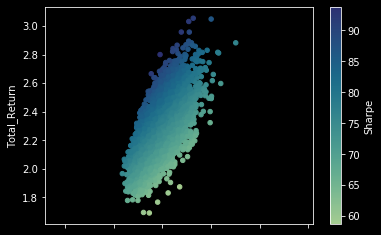

In [30]:
results.plot(kind="scatter", x="Risk", y="Total_Return", c="Sharpe", colormap="crest")

In [33]:
results[results["Sharpe"]>90].sort_values("Sharpe", ascending=False)

,Weights,Total_Return,Risk,Sharpe
3276,"[0.006653923117377688, 0.11392418484816283, 0....",2.800316,0.029776,93.802825
4444,"[0.014721387482708287, 0.078074112794748, 0.06...",3.032333,0.032725,92.440290
4175,"[0.005570341357746169, 0.1440919058963036, 0.0...",2.958309,0.031960,92.337286
1956,"[0.017189477496138188, 0.13677780007433343, 0....",2.665740,0.028870,92.085155
4350,"[0.022389599539546282, 0.12440363995714224, 0....",3.055266,0.033184,91.853474
1495,"[0.014932607345361002, 0.17795368317204086, 0....",2.842533,0.031106,91.151886
1624,"[0.015740234673090506, 0.14463836376670045, 0....",2.865989,0.031529,90.673146
4285,"[0.034213643214288596, 0.07047021154271492, 0....",2.821548,0.031065,90.596924
2039,"[0.002111988738938541, 0.07976035821255695, 0....",2.638462,0.029147,90.276380
2813,"[0.0749232299062232, 0.10018462711119865, 0.03...",2.744694,0.030363,90.158820


In [35]:
results.iloc[3276]["Weights"]

[0.006653923117377688,
 0.11392418484816283,
 0.029778847671024438,
 0.10355774574212463,
 0.15359615347095584,
 0.05729083031611729,
 0.0795362207739041,
 0.235260135300025,
 0.051907039170177985,
 0.10628715206928806,
 0.02359970120831277,
 0.018548406032609214,
 0.020059660279920292]

In [37]:
best_weight = results.iloc[4444]["Weights"]

In [40]:
portfolio = pd.DataFrame(list(zip(companies,best_weight)))
portfolio.columns = ["company","weight"]
portfolio["equity"] = portfolio["weight"]*initial
portfolio

,company,weight,equity
0,IPHI,0.014721,147.213875
1,AMAT,0.078074,780.741128
2,SPWR,0.063917,639.169997
3,QCOM,0.178849,1788.490576
4,ARW,0.088515,885.148762
5,MXIM,0.077398,773.980697
6,TXN,0.009777,97.774471
7,AMD,0.187459,1874.589985
8,NVDA,0.045331,453.305932
9,LSCC,0.164781,1647.810788
